# Intro-to-Astro Week 3
## NASA Exoplanet Archive Assignment

This week, we learned about exoplanet detection methods and explored the NASA Exoplanet Archive together. In this assignment, you will practice using Exoplanet Archive by downloading data and creating some informative plots. 

### Part 1: Finding your data
Launch the NASA Exoplanet Archive at [this link](https://exoplanetarchive.ipac.caltech.edu/). Before we get into data manipulation with Python, let's check out some of the utility of the online portal. Navigate to the "Planetary Systems Composite Data" table.

List the first 3 authors who discovered TOI-6324 b:
Lee, Rena A.
Dai, Fei
Howard, Andrew W.

How many systems list position information (RA, Dec) from sources that are not the TICv8 (TESS Input Catalog)?
264 positions

Explore one of these position reference papers. What was the purpose of their survey?
Microlensing events indicate that super-Earth exoplanets are common in Jupiter-like orbits. The purpose of the paper is to determine the frequency of super-Earths on wide orbits and to provide insights into the formation processes of these planets.

*Hints: Play around with the different columns of data available under 'Select Columns'. You can type in the column headers to search for specific values in the table.*

Now that we have poked around online, let's download the data and plot it. Reset the table by refreshing the page, so your filters and selections are removed. Select "Download Table" and save to your data directory. This CSV file holds information on all the currently confirmed exoplanets. Follow the code prompts below to read in this data file.

In [14]:
# To start, let's import the necessary libraries for this assignment.

import os                           # for file and directory operations
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for plotting data
import numpy as np                  # for numerical operations

# to display plots inline in Jupyter Notebook, use this 'magic command':
%matplotlib inline

In [42]:
# Locate the data file you downloaded from the NASA Exoplanet Archive and read it into a DataFrame

dir = r'D:\Desktop\Intro-to-Astro2025\Week3_Github_and_NASA_Exoplanet_Archive'  # replace with your actual data directory
file = 'PSCompPars_2025.08.10_03.05.17.csv' # replace with your actual data file name
path = os.path.join(dir, file)

# Read the CSV file into a DataFrame
df = pd.read_csv(path, comment='#')
df # let's see what our data table looks like

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5967,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5968,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5969,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5970,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [43]:
# Let's see what columns are available in the DataFrame
print(df.columns) # Note: descriptions of the columns can be found in the beginning of the CSV file

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'pl_trandur', 'pl_trandurerr1',
       'pl_trandurerr2', 'pl_trandurlim', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 

In the following code cells, create and print variables that will provide some information about our data table, such as the number of planets in the table, the discovery facilities, etc.

In [44]:
# How many planets are in the table?
n_planets = len(df)
print(f'The table contains {n_planets} as total exoplanets')

The table contains 5972 as total exoplanets


In [47]:
# How many discovery facilities are listed in the table?
n_discovery_planets = len(df['disc_facility'].unique())
print(f'The total number of discovery facilities are {n_discovery_planets}')

The total number of discovery facilities are 72


### Part 2: Plotting your data

Now that we have taken a look at the data table, let's start using it! We can recreate one of the plots we looked at together on Exoplanet Archive as a quick example.

Text(0, 0.5, 'Mass (Jupiter Masses)')

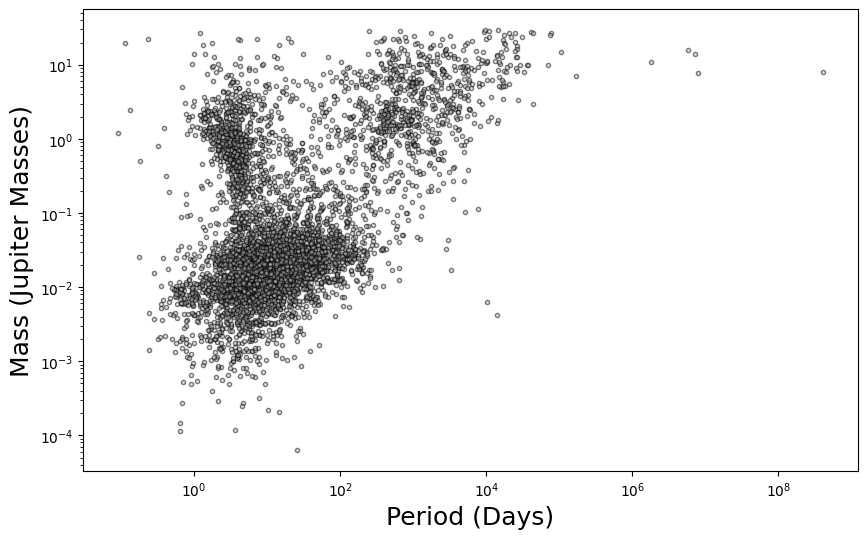

In [48]:
# create a scatter plot of Period (Days) vs Mass (Jupiter Masses) 

# create a figure object and set its size
plt.figure(figsize=(10, 6))

# plot the relevant columns from the DataFrame. 
# You can adjust different parameters like alpha (transparency), color, edgecolor, marker, etc.
plt.scatter(df['pl_orbper'], df['pl_bmassj'], alpha=0.5, color='silver', edgecolor='k', marker='.')

# set the x and y scales to logarithmic so that we can see the data better
plt.xscale('log')
plt.yscale('log')

# label your axes
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)


The above plot shows us the distribution of planet masses and periods like the one on Exoplanet Archive. However, we can take it a step further and distinguish the points according to their discovery method, like the plot online.

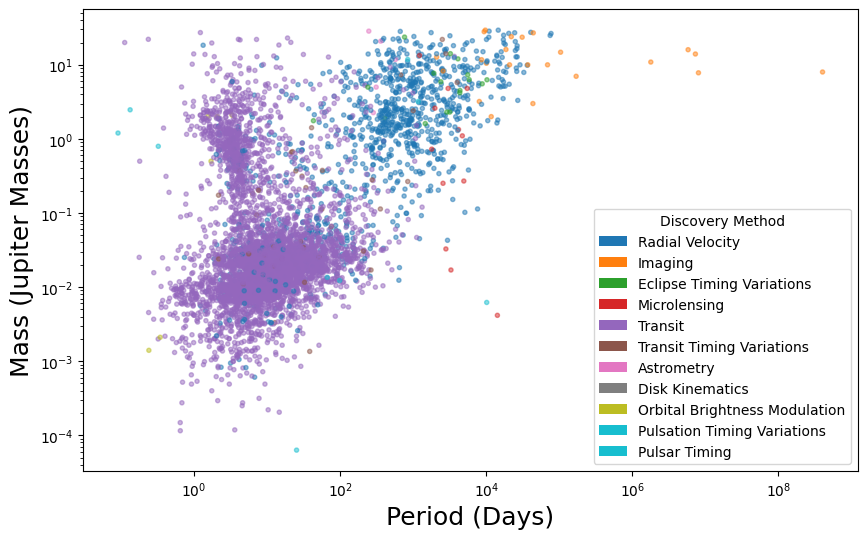

In [49]:
# Taking the same setup as above, but now we will color the points by discovery method
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10 # choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c=colors, alpha=0.5, marker='.') #plot data

# add a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')

Now that you've seen an example, recreate another plot that was already generated on the NASA Exoplanet archive.

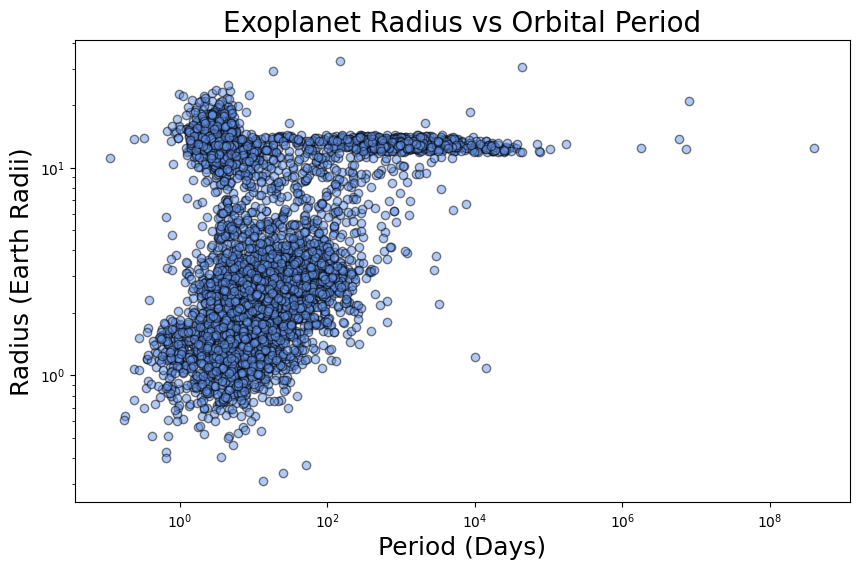

In [56]:
plt.figure(figsize=(10, 6))

# Scatter plot of Planet Radius vs Orbital Period
plt.scatter(df['pl_orbper'], df['pl_rade'], alpha=0.5, color='cornflowerblue', edgecolor='k', marker='o')

# Set both axes to logarithmic scale for better data visualization
plt.xscale('log')
plt.yscale('log')

# Axis labels
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Radius (Earth Radii)', fontsize=18)

# Optional: add a title
plt.title('Exoplanet Radius vs Orbital Period', fontsize=20)

plt.show()


### Part 3: Filtering your data

We saw during the live session that we can filter the data table to include only a subset of planets that we're particularly interested in. Since we downloaded all systems already, we can also filter them here. Let's explore the different kinds of planets that have been discovered by TESS and Kepler, the two main transiting planet missions.

In [53]:
# create Boolean masks to filter the DataFrame for planets discovered by TESS and by Kepler
tess_mask = df['disc_facility'].str.contains('TESS', case=False, na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', case=False, na=False)

# filter the DataFrame using the masks
tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

# How many planets were discovered by TESS and Kepler?
print(f'The table contains {tess_planets} as tess exoplanets')
print(f'The table contains {kepler_planets} as kepler exoplanets')


The table contains              pl_name      hostname  sy_snum  sy_pnum  \
52          AU Mic b        AU Mic        1        3   
53          AU Mic c        AU Mic        1        3   
56    BD+05 4868 A b  BD+05 4868 A        2        1   
79      BD-14 3065 b  BD-14 3065 A        3        1   
142       DS Tuc A b      DS Tuc A        2        1   
...              ...           ...      ...      ...   
5789       WASP-18 c       WASP-18        2        2   
5881       WASP-84 c       WASP-84        1        2   
5898   WD 1856+534 b   WD 1856+534        3        1   
5909      Wolf 327 b      Wolf 327        1        1   
5954        pi Men c      HD 39091        1        3   

                discoverymethod  disc_year  \
52                      Transit       2020   
53                      Transit       2021   
56                      Transit       2025   
79                      Transit       2024   
142                     Transit       2019   
...                         ... 

Let's compare the different planet populations discovered by Kepler and by TESS. 

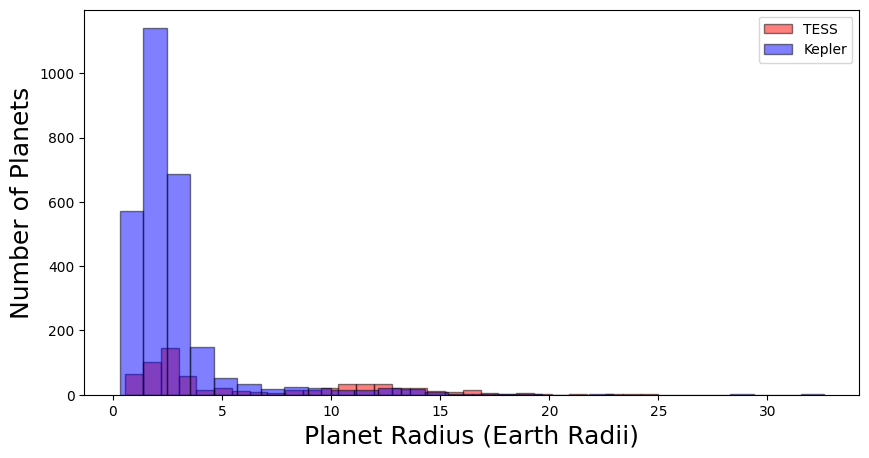

In [54]:
# create a histogram of planet radii for TESS and Kepler planets in Earth radii
plt.figure(figsize=(10, 5))

# plot the data
plt.hist(tess_planets['pl_rade'], bins=30, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=30, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

Let's improve this histogram to create a more informative visual comparison of the two distributions. We can assign common bins and set the axes to logarithmic scales, for example.

In [55]:
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins = np.logspace(np.log10(0.1), np.log10(20), 80) 

# finish on your own

<Figure size 1000x500 with 0 Axes>

What are the most notable differences between the two distributions? What are the similarities? Try re-plotting a 'zoomed-in' section of the above histogram to better view the 'radius valley'.

Differences:
Kepler detects more small and longer-period planets, showing a clearer “radius valley” around 1.5–2 Earth radii. TESS detects more larger, short-period planets and the valley is less pronounced.

Similarities:
Both show a dip at the radius valley, many small planets under ~4 Earth radii, and cover a similar radius range, highlighting two main planet types: rocky super-Earths and gaseous sub-Neptunes.

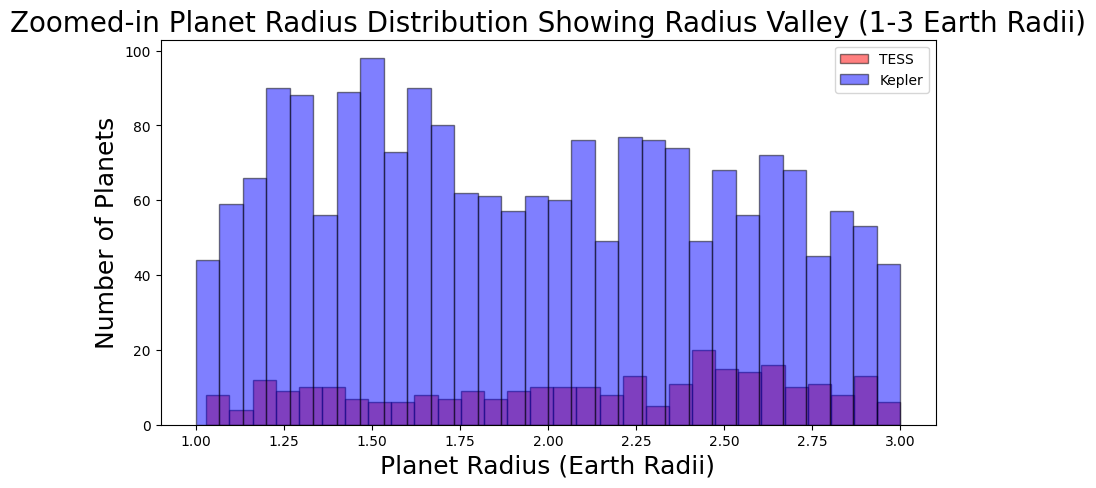

In [59]:
plt.figure(figsize=(10, 5))

# Filter radius values between 1 and 3 Earth radii for both datasets
tess_zoom = tess_planets['pl_rade'][(tess_planets['pl_rade'] >= 1) & (tess_planets['pl_rade'] <= 3)]
kepler_zoom = kepler_planets['pl_rade'][(kepler_planets['pl_rade'] >= 1) & (kepler_planets['pl_rade'] <= 3)]

# Plot the zoomed histograms
plt.hist(tess_zoom, bins=30, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_zoom, bins=30, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)', fontsize=18)
plt.ylabel('Number of Planets', fontsize=18)

plt.title('Zoomed-in Planet Radius Distribution Showing Radius Valley (1-3 Earth Radii)', fontsize=20)

plt.legend()
plt.show()


Use different filters and functions on the data table to answer the following questions:
- How many planets were discovered using the Radial Velocity method?
- How far away is the furthest confirmed exoplanet? What is its name?
- How many planets are smaller than the Earth?

In [65]:
# create a mask for planets discovered by the Radial Velocity method

rv_count = df[df['discoverymethod'] == 'Radial Velocity'].shape[0]
print(f"Number of planets discovered by Radial Velocity: {rv_count}")




# find the furthest confirmed exoplanet

max_distance = df['sy_dist'].max()
furthest_planet = df.loc[df['sy_dist'].idxmax(), 'pl_name']
print(f"The furthest confirmed exoplanet is {furthest_planet}, at {max_distance} parsecs away.")



# count the number of planets smaller than Earth
small_planets_count = df[df['pl_rade'] < 1].shape[0]
print(f"Number of planets smaller than Earth: {small_planets_count}")





Number of planets discovered by Radial Velocity: 1130
The furthest confirmed exoplanet is SWEEPS-11 b, at 8500.0 parsecs away.
Number of planets smaller than Earth: 225


Now that we've had some practice, try out the following exercise. Select only planets that have mass measurements using the same Boolean mask method we did earlier. Then, select a subset of the planets with mass mesurements that also have planet radius measurements (i.e., planet radius and mass columns are not empty/NaN). 

In [67]:
# create a mask for planets with mass measurements
mass_mask = df['pl_bmasse'].notna()
selected_planets = df[mass_mask]

# create a mask for planets that also have planet radius measurements (i.e., planet radius column is not empty/NaN!)
radius_mask = selected_planets['pl_rade'].notna()
planets_with_mass_and_radius = selected_planets[radius_mask]
# Among planets with mass measurements
rv_planets_mass = selected_planets[selected_planets['discoverymethod'] == 'Radial Velocity']
count_rv_mass = rv_planets_mass.shape[0]

# Among planets with both mass and radius measurements
rv_planets_mass_radius = planets_with_mass_and_radius[planets_with_mass_and_radius['discoverymethod'] == 'Radial Velocity']
count_rv_mass_radius = rv_planets_mass_radius.shape[0]

print(f"Planets with mass measurements discovered by Radial Velocity: {count_rv_mass}")
print(f"Planets with both mass and radius measurements discovered by Radial Velocity: {count_rv_mass_radius}")


# how many planets were discovered by the Radial Velocity method?


# how many of those have planet radius measurements?



Planets with mass measurements discovered by Radial Velocity: 1129
Planets with both mass and radius measurements discovered by Radial Velocity: 1120


Now that we have our filtered data, let's make a plot that informs us about this subset of planets. Make a Planet Density (g/cm^3) vs. Planet Radius (Earth Radius) plot. The unit conversions have been coded for you using the astropy package.

In [68]:
import astropy.units as u

# convert planet radius from Earth radii to centimeters
rad_cm = selected_planets['pl_rade'] * u.R_earth.to(u.cm)

# convert planet mass from Earth masses to g
mass_g = selected_planets['pl_bmasse'] * u.M_earth.to(u.g)

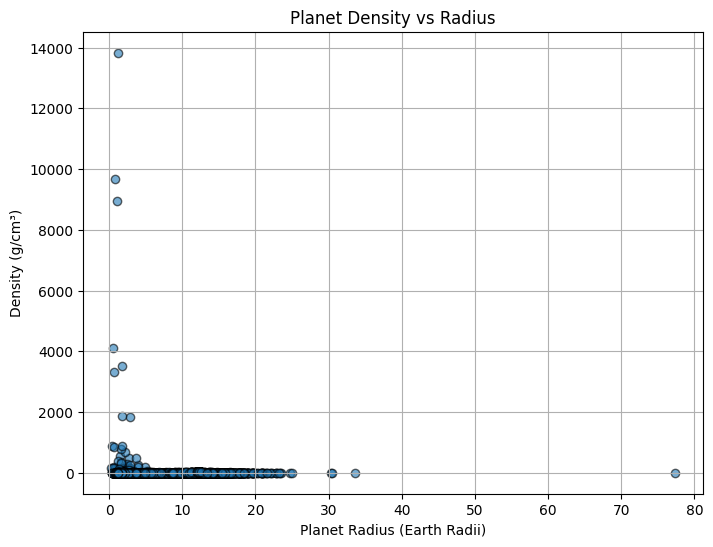

In [69]:
# calculate density in g/cm^3


# create a scatter plot of Density (g/cm^3) vs Planet Radius (Earth Radii)
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

# Convert planet radius to cm
rad_cm = selected_planets['pl_rade'] * u.R_earth.to(u.cm)

# Convert planet mass to g
mass_g = selected_planets['pl_bmasse'] * u.M_earth.to(u.g)

# Calculate volume in cm^3 (sphere volume)
volume_cm3 = (4/3) * np.pi * rad_cm**3

# Calculate density in g/cm^3
density = mass_g / volume_cm3

# Scatter plot: density vs planet radius in Earth radii
plt.figure(figsize=(8,6))
plt.scatter(selected_planets['pl_rade'], density, alpha=0.6, edgecolors='k')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Density (g/cm³)')
plt.title('Planet Density vs Radius')
plt.grid(True)
plt.show()


### Part 4: Choose your own adventure

Using the various things you've learned throughout this tutorial and assignment, create a plot to visualize the correlation between any parameters of your choosing. Choose a specific and interesting subset of planets (e.g., planets discovered via the radial velocity method, nearby planets, etc.). Write down some interesting things you learned from your plot. 

In [70]:
rv_planets = df[df['discoverymethod'] == 'Radial Velocity']

rv_planets_with_mass = rv_planets[rv_planets['pl_bmasse'].notna()]
rv_planets_with_mass_radius = rv_planets_with_mass[rv_planets_with_mass['pl_rade'].notna()]


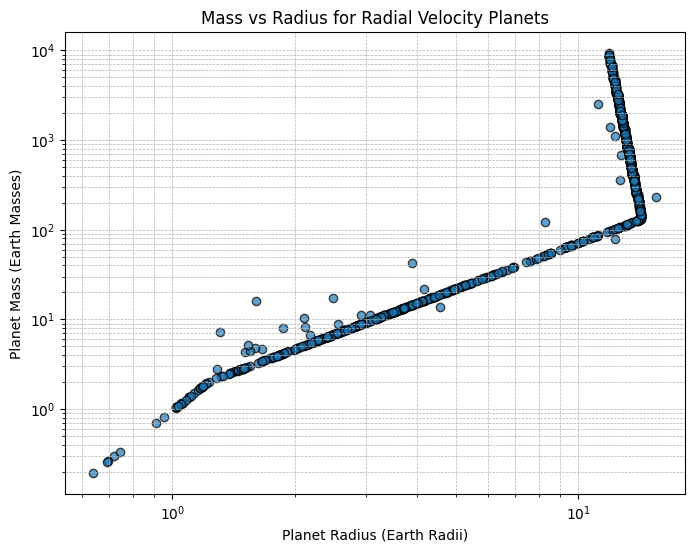

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(rv_planets_with_mass_radius['pl_rade'], rv_planets_with_mass_radius['pl_bmasse'], 
            alpha=0.7, edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Planet Mass (Earth Masses)')
plt.title('Mass vs Radius for Radial Velocity Planets')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()
